# Ford gobike system Project
## By David Ndubuisi

## Introduction
The is the ford gobike system dataset. it is about a bike sharing system covering the greater San Francisco Bay area. The dataset has 183412 rows and 16 columns. Some of the columns include rental `start_time` and `end_time`. `start_station_id`, `start_station_name`, `end_station_id`, `end_station_name`, `bike_id`, `user_type`, `member_birth_year` and `member_gender`. The data could provide insights into bike usage patterns and help understand trends in bike sharing in the Bay Area.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, and print the first five rows in the dataset

bike = pd.read_csv("201902-fordgobike-tripdata.csv")

bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# Checking the number of columns and rows in the dataset
bike.shape

(183412, 16)

In [4]:
# Checking the dtype for each column
print(bike.dtypes)

print('-' *100)

print(bike.info())

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  ob

In [5]:
#Checking the number of duplicated values in the dataset
bike.duplicated().sum()

0

In [6]:
#Checking the number of null values in the dataset
bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
bike.shape

(183412, 16)

In [8]:
bike.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [9]:
bike.member_gender.unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [10]:
bike['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [11]:
bike.bike_share_for_all_trip.unique()

array(['No', 'Yes'], dtype=object)

## Data Cleaning

In [12]:
#First we create copies of the dataset
bike_trip = bike.copy()

### Issue #1: `start_station_id`, `end_station_id` and `bike_id` columns would not be calculated so it should be in string format

#### Define
- Change the `start_station_id` and `end_station_id` columns from float to string.
- Change the `bike_id` column from integer to string

#### Code

In [13]:
#Create a function that can convert datatypes
def convert_dtype(df, column, dtype):
    if dtype == 'datetime':
        df[column] = pd.to_datetime(df[column])
    else:
        df[column] = df[column].astype(dtype)
    return df

In [14]:
# Convert the columns to category datatype
bike_trip = convert_dtype(bike_trip, 'start_station_id', 'str')
bike_trip = convert_dtype(bike_trip, 'end_station_id', 'str')
bike_trip = convert_dtype(bike_trip, 'bike_id', 'str')

#### Test

In [15]:
#verify that the columns have been converted to strings
assert bike_trip['start_station_id'].dtype == 'object' 
assert bike_trip['end_station_id'].dtype == 'object'
assert bike_trip['bike_id'].dtype == 'object'

In [16]:
type(bike_trip['start_station_id'][0])

str

### Issue #2: The datatype `start_time`, `end_time` columns are not correct

#### Define
- Change the datatype of `start_time` and `end_time` columns to datetime

#### Code

In [17]:
# Convert the columns to datetime datatypes
bike_trip = convert_dtype(bike_trip, 'start_time', 'datetime')
bike_trip = convert_dtype(bike_trip, 'end_time', 'datetime')

#### Test

In [18]:
# Verify that the columns have been converted to datetime
print(bike_trip['start_time'].dtypes)

datetime64[ns]


### Issue #3: There are missing values in some columns `start_station_id`, `start_station_name`, `end_station_id`, `end_station_name`, `member_birth_year`, `member_gender`

#### Define
- Drop the rows with missing values

#### Code 

In [19]:
# Drop the rows with missing values
bike_trip.dropna(axis=0, inplace= True)

#### Test

In [20]:
#Check to see if rows have been dropped
bike_trip.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

### Issue #4: The datatype for `user_type` and `member_gender` columns are erroneous

#### Define
- Convert the datatype for `user_type` and `member_gender` columns to category

#### Code

In [21]:
# Recalling the function that converts datatypes using astype(dtype)

# Convert the columns to category datatype
bike_trip = convert_dtype(bike_trip, 'user_type', 'category')
bike_trip = convert_dtype(bike_trip, 'member_gender', 'category')
bike_trip = convert_dtype(bike_trip, 'bike_share_for_all_trip', 'category')

#### Test

In [22]:
assert bike_trip['user_type'].dtype == 'category'
assert bike_trip['member_gender'].dtype == 'category'
assert bike_trip['bike_share_for_all_trip'].dtype == 'category'

## Data Exploration

In [23]:
#Feature engineering: creating some feature columns that I believe will help our analysis

#To achieve that we extract hour, day, month data from the `start_time` and `end_time` columns

# We create a function that can extract the features
def add_time_features(df):
    df['start_hour'] = df['start_time'].dt.hour
    df['start_day'] = df['start_time'].dt.day_name()
    df['start_month'] = df['start_time'].dt.month_name()
    df['end_hour'] = df['end_time'].dt.hour
    df['end_day'] = df['end_time'].dt.day_name()
    df['end_month'] = df['end_time'].dt.month_name()
    return df


In [24]:
# Call on the function that extracts the features of the dataset
bike_trip = add_time_features(bike_trip)

In [25]:
# Change the hour columns from integer to ordered categorical
# This will help in visualizing the bike_trip hour better

ordinal_var_dict = {'start_hour': [int(i) for i in range(0,24)],
                   'end_hour': [int(i) for i in range(0,24)]}

for var in ordinal_var_dict:
    ordered_var = pd.Categorical(bike_trip[var], categories=ordinal_var_dict[var], ordered=True)
    bike_trip[var] = bike_trip[var].astype(ordered_var.dtype)


In [26]:
# Get Age from the member birth year
bike_trip['age'] = 2023 - bike_trip['member_birth_year']

#convert age column to "integer" using the datatype converter function
bike_trip = convert_dtype(bike_trip, 'age', 'int64')

In [27]:
bike_trip.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip          category
start_hour                       category
start_day                          object
start_month                        object
end_hour                         category
end_day                            object
end_month                          object
age                                 int64
dtype: object

In [28]:
bike_trip.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,start_day,start_month,end_hour,end_day,end_month,age
105133,386,2019-02-14 07:39:38.334,2019-02-14 07:46:05.215,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,55.0,Webster St at Grove St,37.777053,...,1966.0,Female,No,7,Thursday,February,7,Thursday,February,57
21368,944,2019-02-26 09:09:12.782,2019-02-26 09:24:56.852,52.0,McAllister St at Baker St,37.777416,-122.441838,363.0,Salesforce Transit Center (Natoma St at 2nd St),37.787492,...,1980.0,Male,No,9,Tuesday,February,9,Tuesday,February,43
34672,972,2019-02-23 21:59:43.010,2019-02-23 22:15:55.242,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,285.0,Webster St at O'Farrell St,37.783521,...,1996.0,Female,No,21,Saturday,February,22,Saturday,February,27
65783,224,2019-02-20 09:20:15.424,2019-02-20 09:23:59.853,66.0,3rd St at Townsend St,37.778742,-122.392741,36.0,Folsom St at 3rd St,37.783830,...,1993.0,Male,No,9,Wednesday,February,9,Wednesday,February,30
50747,1627,2019-02-21 18:25:42.638,2019-02-21 18:52:50.096,25.0,Howard St at 2nd St,37.787522,-122.397405,16.0,Steuart St at Market St,37.794130,...,1982.0,Male,No,18,Thursday,February,18,Thursday,February,41
30764,967,2019-02-24 18:21:53.906,2019-02-24 18:38:01.791,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,127.0,Valencia St at 21st St,37.756708,...,1981.0,Female,No,18,Sunday,February,18,Sunday,February,42
57001,2166,2019-02-21 08:10:05.230,2019-02-21 08:46:11.576,137.0,Jersey St at Castro St,37.750506,-122.433950,16.0,Steuart St at Market St,37.794130,...,1978.0,Male,No,8,Thursday,February,8,Thursday,February,45
133559,540,2019-02-08 18:46:19.337,2019-02-08 18:55:19.489,78.0,Folsom St at 9th St,37.773717,-122.411647,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,...,1983.0,Male,No,18,Friday,February,18,Friday,February,40
123806,399,2019-02-11 09:03:20.709,2019-02-11 09:09:59.796,106.0,Sanchez St at 17th St,37.763242,-122.430675,59.0,S Van Ness Ave at Market St,37.774814,...,1986.0,Male,No,9,Monday,February,9,Monday,February,37
120727,709,2019-02-11 16:39:49.951,2019-02-11 16:51:39.586,121.0,Mission Playground,37.759210,-122.421339,350.0,8th St at Brannan St,37.771431,...,1993.0,Other,No,16,Monday,February,16,Monday,February,30


In [29]:
bike_trip.shape

(174952, 23)

### What is the structure of your dataset?
- Before Data Cleaning there were 183412 rows, and 16 columns
- After Data Cleaning there are 174952 rows and 22 columns
- The dataset has a row for each individual bike trip, with columns for the usage starting and ending time
>the duration of the trip, the starting and ending locations, the information about the customer who took the bike trip

### What is/are the main feature(s) of interest in your dataset?
I am interested in analyzing user behavior for the bike trip, and also to determine the peak times for bike trips day, month and year

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
> The features that will support the investigation into the peak times for bike trips include:

- `start_time` and `end_time` to identify the exact time and duration of each bike trip.
- `start_day` and `end_day` to identify the day of the week when the trips were taken.
- `start_month` and `end_month` to identify the month when the trips were taken.
- `start_hour` and `end_hour` to identify the hour of the day when the trips were taken.
- `start_station_name` and `end_station_name` to identify the popular locations for bike trips.
- `member_gender` and `user_type` to identify the behavior and preferences of the customers.

## Univariate Exploration

###### What is the average duration for bike trips

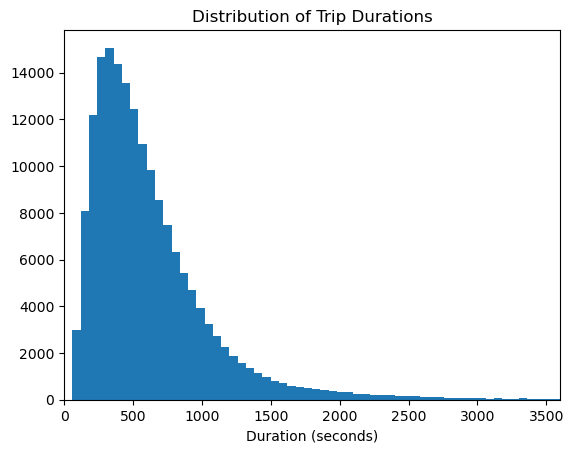

In [30]:
binsize = 60
bins = np.arange(0, bike_trip['duration_sec'].max()+binsize, binsize)

plt.hist(data=bike_trip, x='duration_sec', bins = bins)
plt.xlabel('Duration (seconds)')
plt.title('Distribution of Trip Durations')
plt.xlim(0, 3600);

From the histogram, we can see that most bike trips lasted around 500 seconds 

###### What day of the week have the highest number of bike trips

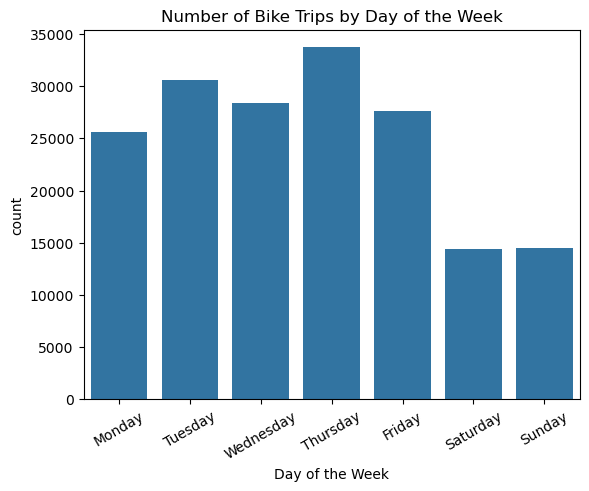

In [31]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
base_color = sns.color_palette()[0]
sns.countplot(data=bike_trip, x='start_day', color=base_color, order=day_order);
plt.xticks(rotation=30);
plt.xlabel('Day of the Week');
plt.title('Number of Bike Trips by Day of the Week');

This graph shows that the bike trips were mostly on working days (Mon - Fri) and Thursday being the day with the highest number of trips

##### Month with the highest bike trips

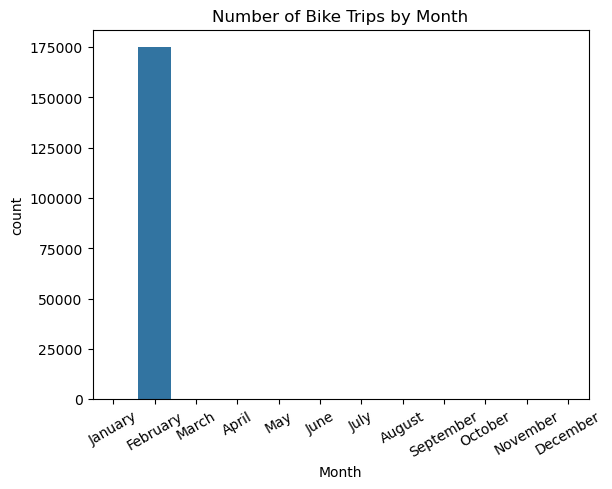

In [32]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.countplot(data=bike_trip, x='start_month', color=base_color, order=month_order);
plt.xticks(rotation=30);
plt.xlabel('Month');
plt.title('Number of Bike Trips by Month');

In [33]:
bike_trip['start_month'].value_counts()

February    174952
Name: start_month, dtype: int64

The dataset only covered data for the month of February

###### At what hour during the day do users like taking bike trips

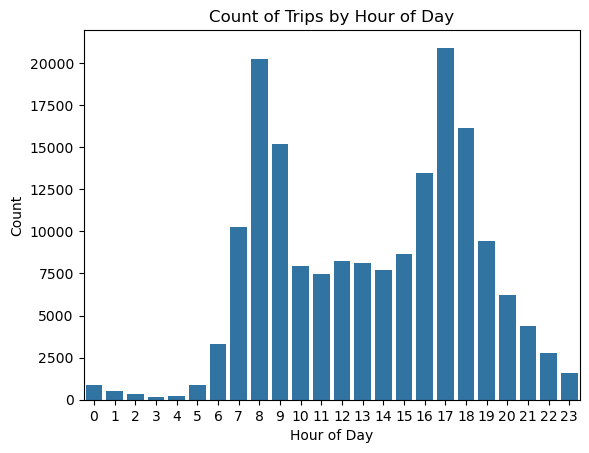

In [34]:
sns.countplot(data=bike_trip, x='start_hour', color=base_color)
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.title('Count of Trips by Hour of Day');

From the bar chart, we can see that the hour with the highest trip records is 17 (5PM) followed by 8 (8AM). It is observed that 
most bike users take the trip to and fro work

###### Which type of users take the bike trips most

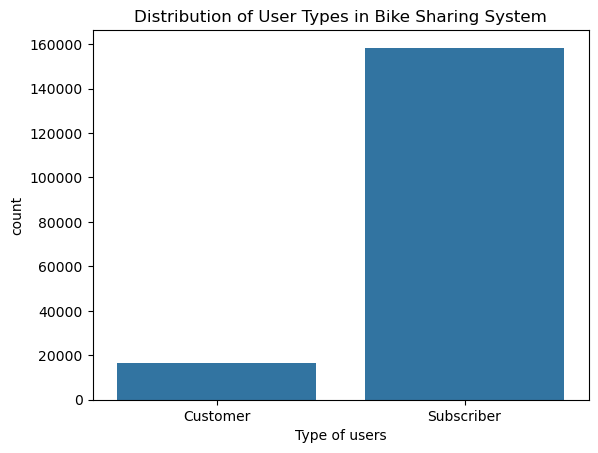

In [35]:
base_color = sns.color_palette()[0]
sns.countplot(data=bike_trip,x='user_type', color = base_color)
plt.title('Distribution of User Types in Bike Sharing System')
plt.xlabel('Type of users');

The type of bike users were mostly subscribers which consisted of about 90.5% of users

###### What are the popular start and end stations

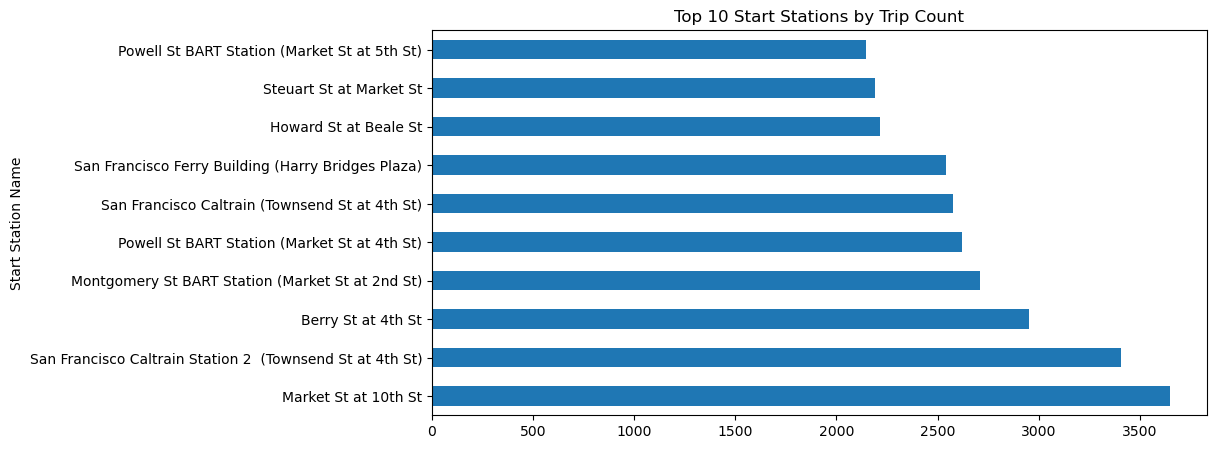

In [36]:
plt.figure(figsize=[10,5])
bike_trip['start_station_name'].value_counts().head(10).plot.barh()
plt.title('Top 10 Start Stations by Trip Count')
plt.ylabel('Start Station Name');

The popular bike trip start station was Market Station at 10th street

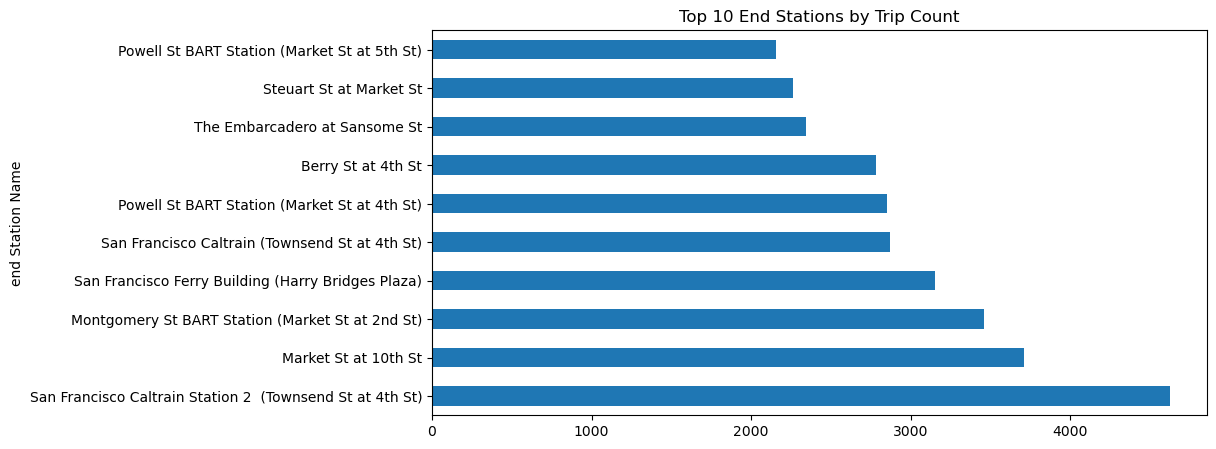

In [37]:
plt.figure(figsize=[10,5])
bike_trip['end_station_name'].value_counts().head(10).plot.barh()
plt.title('Top 10 End Stations by Trip Count')
plt.ylabel('end Station Name');

San Francisco Caltrain Station 2 (Towsend St at 4th Street) was the most popular end bike trip stations

###### The gender of the bike users

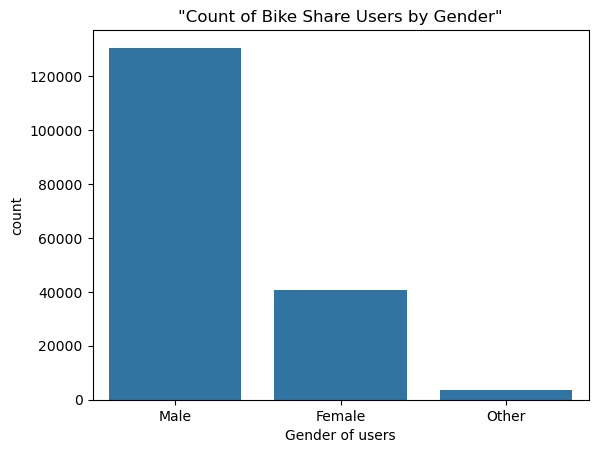

In [38]:
base_color = sns.color_palette()[0]
gender_order = bike_trip['member_gender'].value_counts().index
sns.countplot(data=bike_trip,x='member_gender', color=base_color, order=gender_order)
plt.title('"Count of Bike Share Users by Gender"')
plt.xlabel('Gender of users');

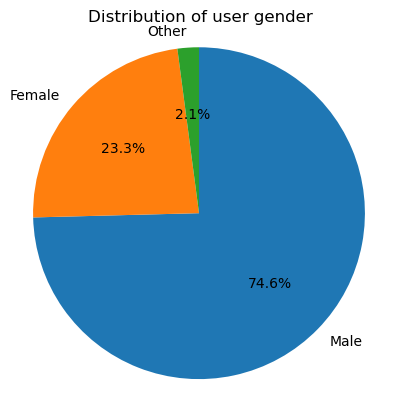

In [39]:
sorted_counts = bike_trip['member_gender'].value_counts()
plt.pie(sorted_counts, labels=sorted_counts.index, startangle=90, counterclock=False, autopct='%1.1f%%')
plt.axis('square')
plt.title('Distribution of user gender');

About 74.6% of the bike users were male, while 23.3% were female. The plot above shows that males are more likely to use the bike system than females or others.

###### Did a good number of users share their bike trip

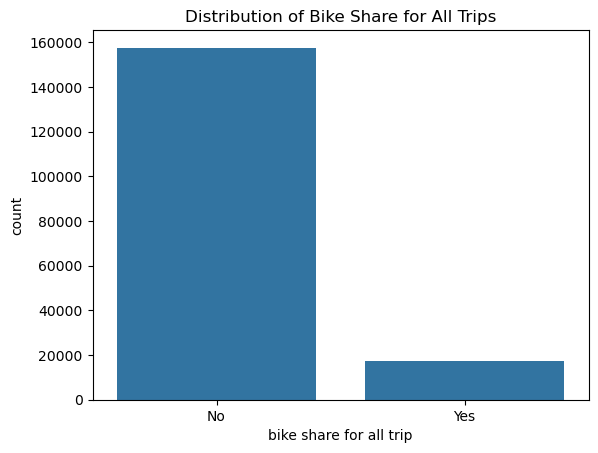

In [40]:
base_color = sns.color_palette()[0]
gender_order = bike_trip['bike_share_for_all_trip'].value_counts().index
sns.countplot(data=bike_trip,x='bike_share_for_all_trip', color=base_color, order=gender_order)
plt.title('Distribution of Bike Share for All Trips')
plt.xlabel('bike share for all trip');

The plot above shows that bike share for all trip is not frequently used

###### what is the distribution of age for the bike users

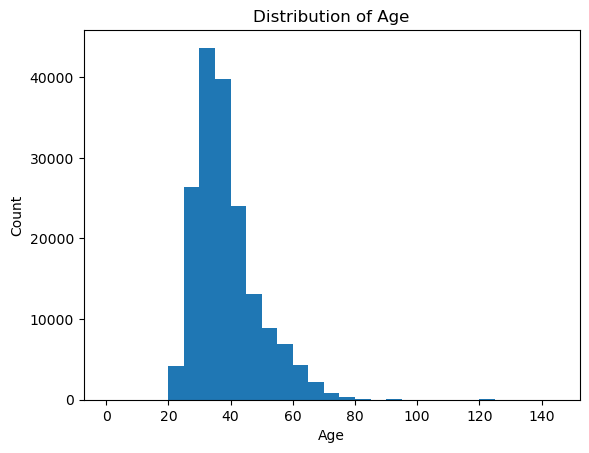

In [41]:
bins = np.arange(0, bike_trip['age'].max()+5, +5)
plt.hist(data=bike_trip, x='age', bins=bins)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age');

The plot shows that the most users are aged between 25 - 42 years olds. Meaning that these are the ages that usually use the bike trip during mostly weekdays for work.

## Bivariate Exploration

###### Relationship betweem user type, bike share trips and number of trips

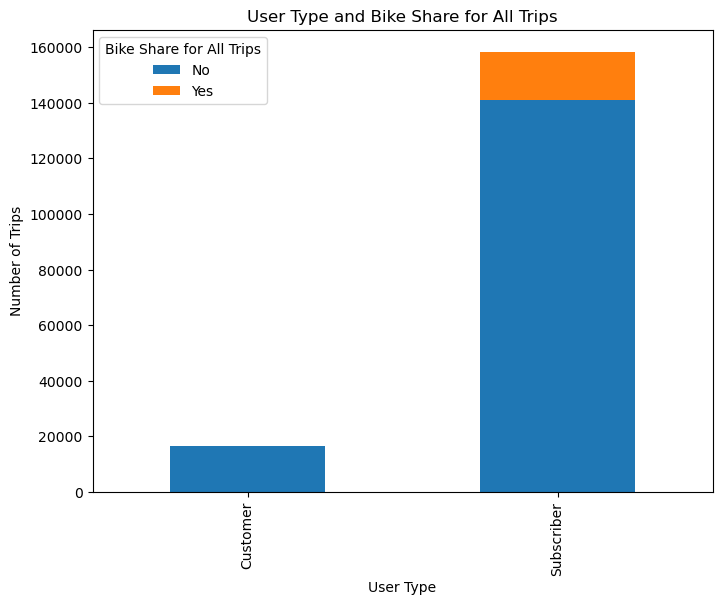

In [42]:
# Create a pivot table of user type and bike share for all trips
pivot = bike_trip.pivot_table(index='user_type', columns='bike_share_for_all_trip', values='duration_sec', aggfunc='count')

# Plot the stacked bar chart
pivot.plot(kind='bar', stacked=True, figsize=(8,6))

# Add labels and title
plt.xlabel('User Type')
plt.ylabel('Number of Trips')
plt.title('User Type and Bike Share for All Trips')
plt.legend(title='Bike Share for All Trips', loc='upper left')
plt.show()

Most subscribers did not share their bike trip, but a substantial amount of subscribers did share their bike trip over customer user types

###### Which user types took longer trips

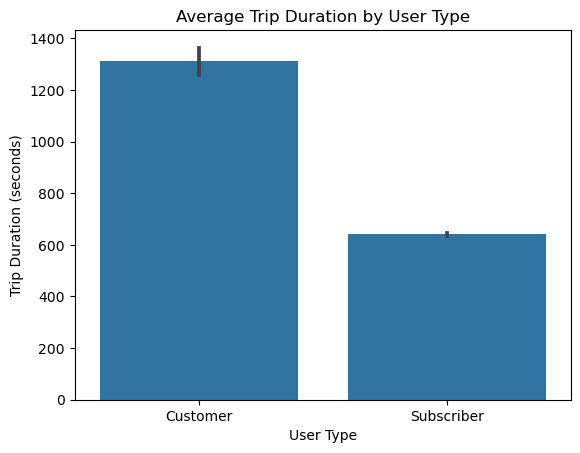

In [43]:
base_color = sns.color_palette()[0]
sns.barplot(data=bike_trip, x='user_type', y='duration_sec', color = base_color)
plt.xlabel('User Type')
plt.ylabel('Trip Duration (seconds)')
plt.title('Average Trip Duration by User Type')
plt.show()

Customers user types went on longer trip than subscribers

###### What is the weekly bike usage by user type

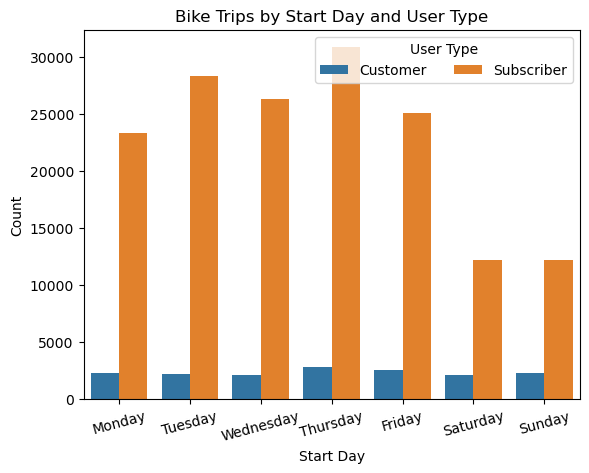

In [44]:
sns.countplot(data=bike_trip, x='start_day', hue='user_type', order=day_order)
plt.xticks(rotation=15)
plt.legend(title='User Type', ncol=2)
plt.xlabel('Start Day')
plt.ylabel('Count')
plt.title('Bike Trips by Start Day and User Type');

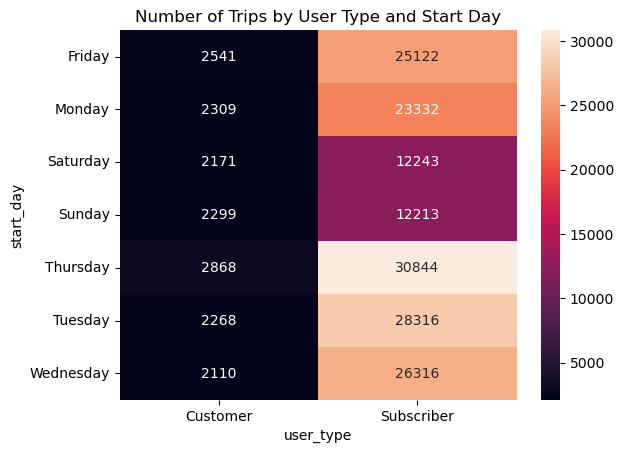

In [45]:
ct_counts = bike_trip.groupby(['start_day', 'user_type']).size()

# Use Series.reset_index() to convert a series into a dataframe object
ct_counts = ct_counts.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data, to have vehicle class on rows
ct_counts = ct_counts.pivot(index = 'start_day', columns = 'user_type', values = 'count')

# Create the heatmap with title
ax = sns.heatmap(ct_counts, annot = True, fmt = 'd')
ax.set_title('Number of Trips by User Type and Start Day')

# Show the plot
plt.show()

Both the Customer and subscriber user type had the highest number of trips on Thursday

###### What is the trip duration distribution for each gender

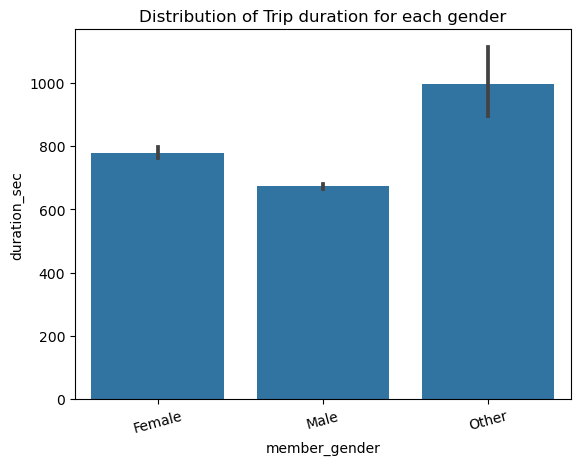

In [46]:
base_color = sns.color_palette()[0]
sns.barplot(data=bike_trip, x='member_gender', y='duration_sec', color=base_color)
plt.title('Distribution of Trip duration for each gender')
plt.xticks(rotation=15);

The male gender has the shortest trips

##### What's the distribution of bike trips by user type and gender

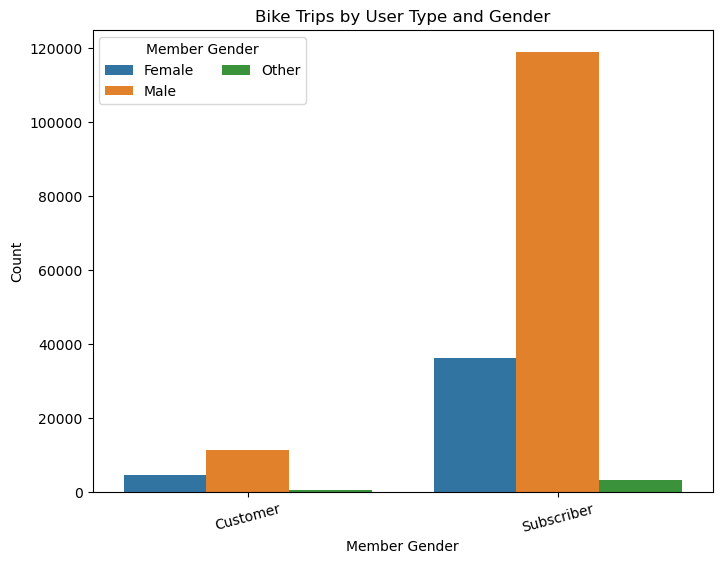

In [47]:
plt.figure(figsize=(8, 6))
sns.countplot(data=bike_trip, x='user_type', hue='member_gender')
plt.xticks(rotation=15)
plt.legend(title='Member Gender', ncol=2)
plt.xlabel('Member Gender')
plt.ylabel('Count')
plt.title('Bike Trips by User Type and Gender');

From the plot, we can see that there are more male users than female users for both customer and subscriber user types. We can also see that the number of male subscribers is much higher than the number of female subscribers, while the difference is less pronounced for customers.

###### What is the age distribution by user type

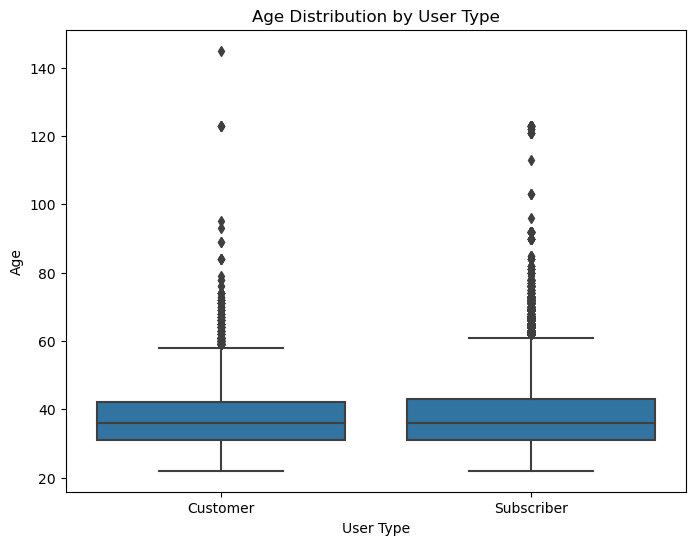

In [48]:
plt.figure(figsize=[8,6])
sns.boxplot(data = bike_trip, x = 'user_type', y = 'age', color = base_color)
plt.ylabel('Age')
plt.xlabel('User Type')
plt.title('Age Distribution by User Type');

From the plot, subscribers tend to be slightly older on average than customers. The boxplots for both user types show a similar distribution of age, with a larger range of ages for customers. There are some outliers for both groups, but they are more common for customers. Overall, we can conclude that the age distribution is relatively similar between the two user types, but subscribers tend to be slightly older on average.

## Multivariate Visualizations

###### What is the relationship between start hour, user type and gender

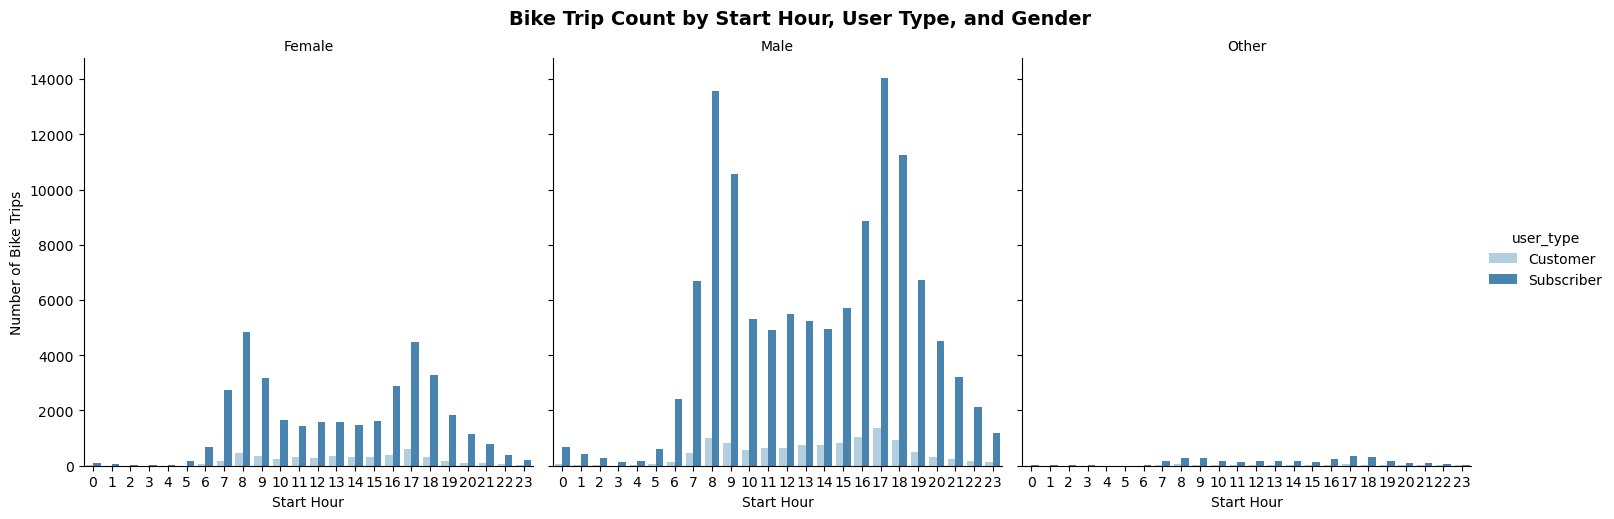

In [49]:
g = sns.catplot(data=bike_trip, x='start_hour', hue='user_type', col='member_gender', kind='count', palette='Blues')
g.set_axis_labels('Start Hour', 'Number of Bike Trips')
g.set_titles('{col_name}')
g.fig.suptitle('Bike Trip Count by Start Hour, User Type, and Gender', y=1.03, fontsize=14, fontweight='semibold')
plt.show()

From the plot we can see that
- There are more trips taken by male members than female members across all start hours
- Subscribers tend to take more trips during rush hours, while customers have a more spread-out usage pattern throughout the day.

###### What is the average trip duration by start hour, end hour and user type

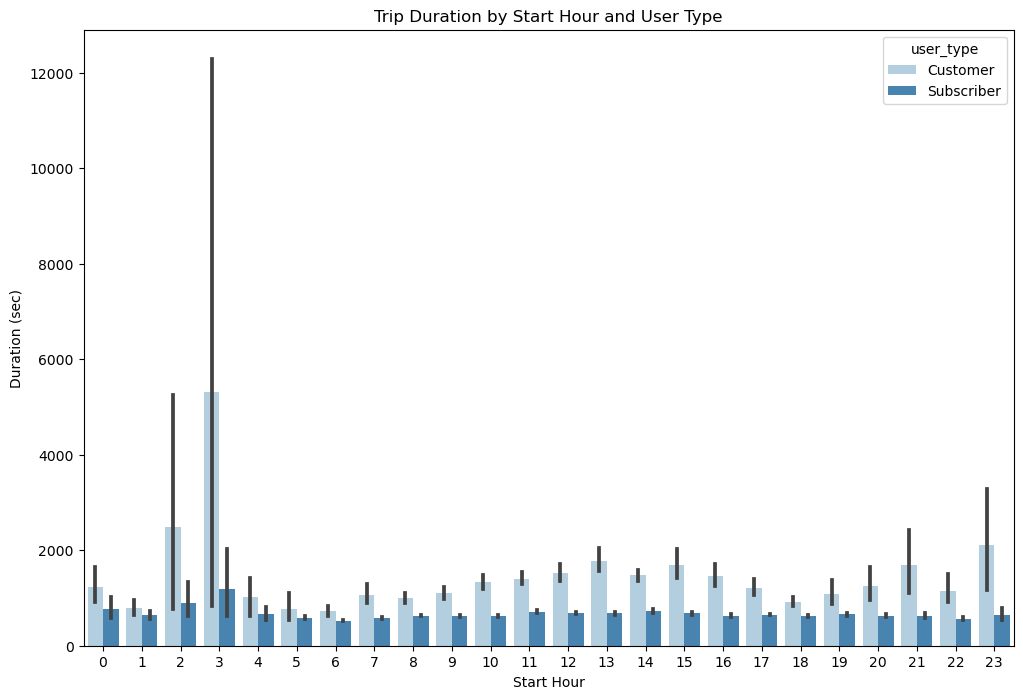

In [50]:
plt.figure(figsize=(12, 8))
sns.barplot(data=bike_trip, x='start_hour', y='duration_sec', hue='user_type', palette='Blues')
plt.title('Trip Duration by Start Hour and User Type')
plt.xlabel('Start Hour')
plt.ylabel('Duration (sec)')
plt.show()

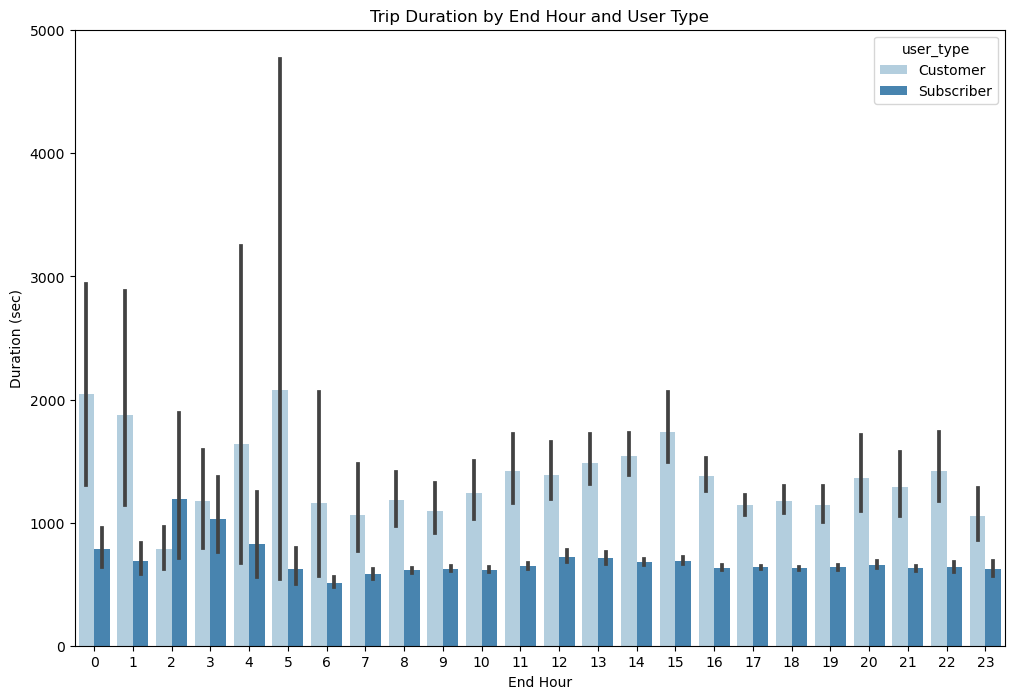

In [51]:
plt.figure(figsize=(12, 8))
sns.barplot(data=bike_trip, x='end_hour', y='duration_sec', hue='user_type', palette='Blues')
plt.title('Trip Duration by End Hour and User Type')
plt.xlabel('End Hour')
plt.ylabel('Duration (sec)')
plt.show()

The plot shows that customers tend to have longer trip durations than subscribers, and that the average trip duration is generally longer during the early morning and late afternoon hours.

###### What is the average trip duration across weekdays for each user type

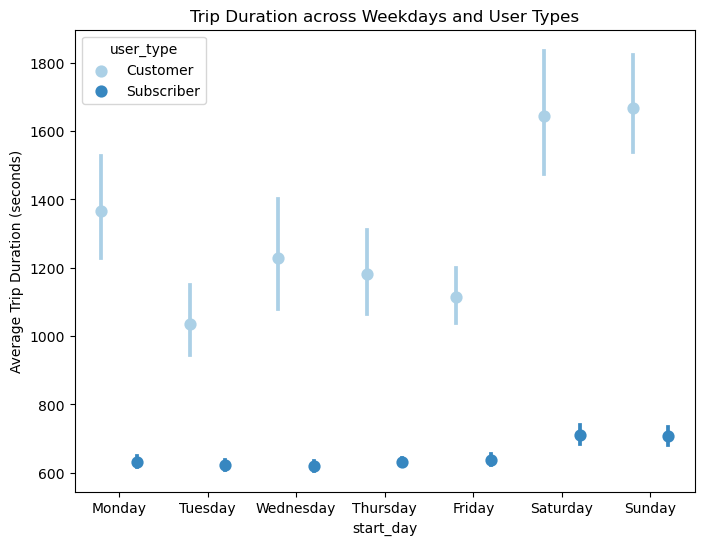

In [52]:
fig, ax = plt.subplots(figsize=[8,6])

sns.pointplot(data=bike_trip, x='start_day', y='duration_sec', hue='user_type',
             palette='Blues', linestyles='', dodge=0.4, ax=ax, order=day_order)

ax.set_title('Trip Duration across Weekdays and User Types')
ax.set_ylabel('Average Trip Duration (seconds)')
ax.set_yticklabels([], minor=True)
plt.show()

From the plot, we can say that the average trip duration is generally lower on weekdays compared to weekends for both subscriber and customer user types. Additionally, subscribers tend to have shorter trip durations compared to customers on all days of the week.

In [53]:
bike_trip.to_csv('clean_bike.csv', sep=',', index=False)

## Conclusions

- There were significantly more subscribers than customers using the bike-sharing service, suggesting that the service may be more appealing to frequent users rather than one-time users. Additionally, subscribers tended to have shorter trip durations than customers.

- The data also revealed that the majority of bike trips occurred on weekdays, with the highest number of trips on Thursday and Tuesdays. Moreover, there was a clear difference in usage patterns between subscribers and customers, with subscribers predominantly using the service for commuting during rush hours, while customers used the service more during midday or recreational

- the data showed that male users dominated the service, accounting for about 74.6% of all bike trips. Additionally, male users tended to have shorter trip durations than female users.